# Imports

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer


# Use Dataset

In [2]:
df = pd.read_csv('dataset/mobile_addiction_data.csv')

df.head()

,User_ID,Country,Age,Gender,Occupation,Education_Level,Income_USD,Daily_Screen_Time_Hours,Phone_Unlocks_Per_Day,Social_Media_Usage_Hours,...,Online_Shopping_Hours,Internet_Connection_Type,Primary_Device_Brand,Has_Screen_Time_Management_App,Self_Reported_Addiction_Level,Monthly_Data_Usage_GB,Has_Night_Mode_On,Age_First_Phone,Push_Notifications_Per_Day,Tech_Savviness_Score
0,1,India,32,Male,Salesperson,High School,43865.49,5.81,75,0.84,...,1.85,5G,Other,No,Low,16.43,Yes,16,106,39.36
1,2,UK,26,Male,Artist,Master's,41868.19,9.05,61,3.13,...,0.66,4G,Samsung,Yes,Severe,32.87,No,12,111,9.45
2,3,Germany,70,Other,Doctor,High School,59636.51,5.76,58,2.12,...,-0.14,WiFi,Samsung,Yes,Severe,27.45,No,18,90,50.27
3,4,UK,44,Female,Engineer,NaN,39022.07,6.71,80,1.60,...,0.17,3G,Apple,Yes,Moderate,30.85,No,17,60,30.82
4,5,Brazil,46,Other,Student,NaN,-783.98,6.31,136,1.51,...,0.58,3G,Xiaomi,No,High,10.38,Yes,18,127,21.70


In [3]:

# Forma e datasetit
print("Number of rows::",df.shape[0])
print("Number of columns::",df.shape[1])
print("==================================================================")

# Llojet e atributeve
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Atributet kategorike", categorical_columns)
print("Atributet numerike", numerical_columns)

Number of rows:: 3000
Number of columns:: 34
Atributet kategorike Index(['Country', 'Gender', 'Occupation', 'Education_Level',
       'Relationship_Status', 'Has_Children', 'Urban_or_Rural',
       'Internet_Connection_Type', 'Primary_Device_Brand',
       'Has_Screen_Time_Management_App', 'Self_Reported_Addiction_Level',
       'Has_Night_Mode_On'],
      dtype='object')
Atributet numerike Index(['User_ID', 'Age', 'Income_USD', 'Daily_Screen_Time_Hours',
       'Phone_Unlocks_Per_Day', 'Social_Media_Usage_Hours',
       'Gaming_Usage_Hours', 'Streaming_Usage_Hours', 'Messaging_Usage_Hours',
       'Work_Related_Usage_Hours', 'Sleep_Hours', 'Physical_Activity_Hours',
       'Mental_Health_Score', 'Depression_Score', 'Anxiety_Score',
       'Stress_Level', 'Time_Spent_With_Family_Hours', 'Online_Shopping_Hours',
       'Monthly_Data_Usage_GB', 'Age_First_Phone',
       'Push_Notifications_Per_Day', 'Tech_Savviness_Score'],
      dtype='object')


In [4]:
#columns name formatting

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [5]:
print("General Statistics::\n")
print(df.info())

print("Summary Statistics::\n")
print(df.describe(include='all'))

General Statistics::

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         3000 non-null   int64  
 1   country                         3000 non-null   object 
 2   age                             3000 non-null   int64  
 3   gender                          3000 non-null   object 
 4   occupation                      3000 non-null   object 
 5   education_level                 2388 non-null   object 
 6   income_usd                      3000 non-null   float64
 7   daily_screen_time_hours         3000 non-null   float64
 8   phone_unlocks_per_day           3000 non-null   int64  
 9   social_media_usage_hours        3000 non-null   float64
 10  gaming_usage_hours              3000 non-null   float64
 11  streaming_usage_hours           3000 non-null   float64
 12  messaging_us

In [6]:
# drop unnecessary columns
df = df.drop(columns=[
    'user_id',
    'primary_device_brand',
    'internet_connection_type',
    
], errors='ignore')

df.head()

,country,age,gender,occupation,education_level,income_usd,daily_screen_time_hours,phone_unlocks_per_day,social_media_usage_hours,gaming_usage_hours,...,urban_or_rural,time_spent_with_family_hours,online_shopping_hours,has_screen_time_management_app,self_reported_addiction_level,monthly_data_usage_gb,has_night_mode_on,age_first_phone,push_notifications_per_day,tech_savviness_score
0,India,32,Male,Salesperson,High School,43865.49,5.81,75,0.84,-1.55,...,Rural,1.70,1.85,No,Low,16.43,Yes,16,106,39.36
1,UK,26,Male,Artist,Master's,41868.19,9.05,61,3.13,2.50,...,Rural,0.90,0.66,Yes,Severe,32.87,No,12,111,9.45
2,Germany,70,Other,Doctor,High School,59636.51,5.76,58,2.12,1.96,...,Urban,1.69,-0.14,Yes,Severe,27.45,No,18,90,50.27
3,UK,44,Female,Engineer,NaN,39022.07,6.71,80,1.60,2.70,...,Urban,1.11,0.17,Yes,Moderate,30.85,No,17,60,30.82
4,Brazil,46,Other,Student,NaN,-783.98,6.31,136,1.51,1.73,...,Urban,1.06,0.58,No,High,10.38,Yes,18,127,21.70


In [7]:

# Vlerat e zbrazëta
print("Columns with Missing Values::", df.columns[df.isnull().any()].tolist())
print("Number of rows with Missing Values::", df.isnull().any(axis=1).sum())
print("Sample Indices with missing data::", df.isnull().any(axis=1).to_numpy().nonzero()[0].tolist()[0:10])

Columns with Missing Values:: ['education_level']
Number of rows with Missing Values:: 612
Sample Indices with missing data:: [3, 4, 8, 16, 18, 40, 44, 45, 55, 66]


In [8]:
# Trajtimi i vlerave te zbrazta
mode_value = df['education_level'].mode()[0]
df['education_level'].fillna(mode_value, inplace=True)
print(f"Filled missing education_level with mode: {mode_value}")


Filled missing education_level with mode: High School


In [9]:
numeric_df = df.select_dtypes(include=[np.number])

negatives_mask = numeric_df < 0

negatives_count = negatives_mask.sum()

print("=== Negative Number Summary ===")
for col, count in negatives_count.items():
    if count > 0:
        print(f"{col}: {count} negative values")
    else:
        print(f"{col}: No negative values")

=== Negative Number Summary ===
age: No negative values
income_usd: 81 negative values
daily_screen_time_hours: 9 negative values
phone_unlocks_per_day: 1 negative values
social_media_usage_hours: 70 negative values
gaming_usage_hours: 213 negative values
streaming_usage_hours: 67 negative values
messaging_usage_hours: 2 negative values
work_related_usage_hours: 53 negative values
sleep_hours: No negative values
physical_activity_hours: 80 negative values
mental_health_score: No negative values
depression_score: No negative values
anxiety_score: No negative values
stress_level: No negative values
time_spent_with_family_hours: 96 negative values
online_shopping_hours: 181 negative values
monthly_data_usage_gb: 16 negative values
age_first_phone: No negative values
push_notifications_per_day: 3 negative values
tech_savviness_score: No negative values


In [10]:
# show rows that contain any negative numeric values
rows_with_negatives = df[negatives_mask.any(axis=1)]

rows_with_negatives.head()

,country,age,gender,occupation,education_level,income_usd,daily_screen_time_hours,phone_unlocks_per_day,social_media_usage_hours,gaming_usage_hours,...,urban_or_rural,time_spent_with_family_hours,online_shopping_hours,has_screen_time_management_app,self_reported_addiction_level,monthly_data_usage_gb,has_night_mode_on,age_first_phone,push_notifications_per_day,tech_savviness_score
0,India,32,Male,Salesperson,High School,43865.49,5.81,75,0.84,-1.55,...,Rural,1.70,1.85,No,Low,16.43,Yes,16,106,39.36
2,Germany,70,Other,Doctor,High School,59636.51,5.76,58,2.12,1.96,...,Urban,1.69,-0.14,Yes,Severe,27.45,No,18,90,50.27
4,Brazil,46,Other,Student,High School,-783.98,6.31,136,1.51,1.73,...,Urban,1.06,0.58,No,High,10.38,Yes,18,127,21.70
12,USA,18,Female,Engineer,Bachelor's,16430.69,5.01,75,1.12,0.69,...,Urban,2.16,-0.23,Yes,Severe,29.76,Yes,8,112,37.84
17,Mexico,18,Male,Doctor,PhD,40513.10,6.06,68,1.38,-0.52,...,Urban,2.33,0.90,No,Severe,31.20,No,13,12,47.86


In [11]:
# replace all negative hours to 0
time_columns = [
    "daily_screen_time_hours",
    "phone_unlocks_per_day",
    "social_media_usage_hours",
    "gaming_usage_hours",
    "streaming_usage_hours",
    "messaging_usage_hours",
    "work_related_usage_hours",
    "sleep_hours",
    "physical_activity_hours",
    "time_spent_with_family_hours",
    "online_shopping_hours",
    "monthly_data_usage_gb",
    "push_notifications_per_day"
]

df[time_columns] = df[time_columns].clip(lower=0)

rows_with_negatives = df[negatives_mask.any(axis=1)]

rows_with_negatives.head()

,country,age,gender,occupation,education_level,income_usd,daily_screen_time_hours,phone_unlocks_per_day,social_media_usage_hours,gaming_usage_hours,...,urban_or_rural,time_spent_with_family_hours,online_shopping_hours,has_screen_time_management_app,self_reported_addiction_level,monthly_data_usage_gb,has_night_mode_on,age_first_phone,push_notifications_per_day,tech_savviness_score
0,India,32,Male,Salesperson,High School,43865.49,5.81,75,0.84,0.00,...,Rural,1.70,1.85,No,Low,16.43,Yes,16,106,39.36
2,Germany,70,Other,Doctor,High School,59636.51,5.76,58,2.12,1.96,...,Urban,1.69,0.00,Yes,Severe,27.45,No,18,90,50.27
4,Brazil,46,Other,Student,High School,-783.98,6.31,136,1.51,1.73,...,Urban,1.06,0.58,No,High,10.38,Yes,18,127,21.70
12,USA,18,Female,Engineer,Bachelor's,16430.69,5.01,75,1.12,0.69,...,Urban,2.16,0.00,Yes,Severe,29.76,Yes,8,112,37.84
17,Mexico,18,Male,Doctor,PhD,40513.10,6.06,68,1.38,0.00,...,Urban,2.33,0.90,No,Severe,31.20,No,13,12,47.86


In [12]:
# Select all rows that contains NaN value
nan_rows = df[df.isna().any(axis=1)]
print(df.isna().sum()[df.isna().sum() > 0])

print("=== Rows containing NaN values ===")
nan_rows.head()

Series([], dtype: int64)
=== Rows containing NaN values ===


,country,age,gender,occupation,education_level,income_usd,daily_screen_time_hours,phone_unlocks_per_day,social_media_usage_hours,gaming_usage_hours,...,urban_or_rural,time_spent_with_family_hours,online_shopping_hours,has_screen_time_management_app,self_reported_addiction_level,monthly_data_usage_gb,has_night_mode_on,age_first_phone,push_notifications_per_day,tech_savviness_score


In [13]:
# Check for duplicate rows 
duplicate_rows = df[df.duplicated()]

print(f"Number of duplicate rows found: {duplicate_rows.shape[0]}")


if duplicate_rows.shape[0] > 0:
    df = df.drop_duplicates()
    print(" Duplicate rows removed successfully.")
else:
    print(" No duplicate rows found.")


print(f"New dataset shape: {df.shape}")

Number of duplicate rows found: 0
 No duplicate rows found.
New dataset shape: (3000, 31)


In [14]:
#Typecasting categorical columns

df = df.apply(lambda col: col.map({'Yes': 1, 'No': 0}) if col.dropna().isin(['Yes', 'No']).all() else col)

df['has_children'] = df['has_children'].astype(bool)

df.head()

,country,age,gender,occupation,education_level,income_usd,daily_screen_time_hours,phone_unlocks_per_day,social_media_usage_hours,gaming_usage_hours,...,urban_or_rural,time_spent_with_family_hours,online_shopping_hours,has_screen_time_management_app,self_reported_addiction_level,monthly_data_usage_gb,has_night_mode_on,age_first_phone,push_notifications_per_day,tech_savviness_score
0,India,32,Male,Salesperson,High School,43865.49,5.81,75,0.84,0.00,...,Rural,1.70,1.85,0,Low,16.43,1,16,106,39.36
1,UK,26,Male,Artist,Master's,41868.19,9.05,61,3.13,2.50,...,Rural,0.90,0.66,1,Severe,32.87,0,12,111,9.45
2,Germany,70,Other,Doctor,High School,59636.51,5.76,58,2.12,1.96,...,Urban,1.69,0.00,1,Severe,27.45,0,18,90,50.27
3,UK,44,Female,Engineer,High School,39022.07,6.71,80,1.60,2.70,...,Urban,1.11,0.17,1,Moderate,30.85,0,17,60,30.82
4,Brazil,46,Other,Student,High School,-783.98,6.31,136,1.51,1.73,...,Urban,1.06,0.58,0,High,10.38,1,18,127,21.70


In [15]:
# handling categorical columns with one-hot encoding

education_type = { 'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4 , np.nan: -1 }
relationship_status_type = { 'Single': 1, 'In Relationship': 2, 'Married': 3, 'Divorced': 4, np.nan: -1 }
df['education_level'] = df['education_level'].replace("Master's", "Master")
df['education_level_encoded'] = df['education_level'].map(education_type)
df['relationship_status_encoded'] = df['relationship_status'].map(relationship_status_type)

df.head()

,country,age,gender,occupation,education_level,income_usd,daily_screen_time_hours,phone_unlocks_per_day,social_media_usage_hours,gaming_usage_hours,...,online_shopping_hours,has_screen_time_management_app,self_reported_addiction_level,monthly_data_usage_gb,has_night_mode_on,age_first_phone,push_notifications_per_day,tech_savviness_score,education_level_encoded,relationship_status_encoded
0,India,32,Male,Salesperson,High School,43865.49,5.81,75,0.84,0.00,...,1.85,0,Low,16.43,1,16,106,39.36,1.0,1
1,UK,26,Male,Artist,Master,41868.19,9.05,61,3.13,2.50,...,0.66,1,Severe,32.87,0,12,111,9.45,3.0,2
2,Germany,70,Other,Doctor,High School,59636.51,5.76,58,2.12,1.96,...,0.00,1,Severe,27.45,0,18,90,50.27,1.0,1
3,UK,44,Female,Engineer,High School,39022.07,6.71,80,1.60,2.70,...,0.17,1,Moderate,30.85,0,17,60,30.82,1.0,2
4,Brazil,46,Other,Student,High School,-783.98,6.31,136,1.51,1.73,...,0.58,0,High,10.38,1,18,127,21.70,1.0,4


In [16]:
# Handle categorical data 1
urban_or_rural_type = {
    'Urban': 1,
    'Rural': 2,
    np.nan: -1
}

self_reported_addiction_level_type = {
    'Low': 1,
    'Moderate': 2,
    'High': 3,
    'Severe': 4,
    np.nan: -1
}

gender_type = {
    'Male': 1,
    'Female': 2,
    'Other': 3,
    np.nan: -1
}

df['urban_or_rural_encoded'] = df['urban_or_rural'].map(urban_or_rural_type)
df['self_reported_addiction_level_encoded'] = df['self_reported_addiction_level'].map(self_reported_addiction_level_type)
df['gender_encoded'] = df['gender'].map(gender_type)

df.head()

,country,age,gender,occupation,education_level,income_usd,daily_screen_time_hours,phone_unlocks_per_day,social_media_usage_hours,gaming_usage_hours,...,monthly_data_usage_gb,has_night_mode_on,age_first_phone,push_notifications_per_day,tech_savviness_score,education_level_encoded,relationship_status_encoded,urban_or_rural_encoded,self_reported_addiction_level_encoded,gender_encoded
0,India,32,Male,Salesperson,High School,43865.49,5.81,75,0.84,0.00,...,16.43,1,16,106,39.36,1.0,1,2,1,1
1,UK,26,Male,Artist,Master,41868.19,9.05,61,3.13,2.50,...,32.87,0,12,111,9.45,3.0,2,2,4,1
2,Germany,70,Other,Doctor,High School,59636.51,5.76,58,2.12,1.96,...,27.45,0,18,90,50.27,1.0,1,1,4,3
3,UK,44,Female,Engineer,High School,39022.07,6.71,80,1.60,2.70,...,30.85,0,17,60,30.82,1.0,2,1,2,2
4,Brazil,46,Other,Student,High School,-783.98,6.31,136,1.51,1.73,...,10.38,1,18,127,21.70,1.0,4,1,3,3


In [17]:
# Agregimi
# Create screen time bins
bins = [0, 2, 4, 6, 8, 24]
labels = ['0-2','2-4','4-6','6-8','8+']
df['screen_time_bin'] = pd.cut(df['daily_screen_time_hours'], bins=bins, labels=labels)

df.groupby('screen_time_bin')[['mental_health_score','depression_score','sleep_hours']].mean()

C:\Users\Rinor\AppData\Local\Temp\ipykernel_7936\2275584838.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('screen_time_bin')[['mental_health_score','depression_score','sleep_hours']].mean()


,mental_health_score,depression_score,sleep_hours
screen_time_bin,,,
0-2,53.851803,48.939180,6.380820
2-4,50.731529,51.324612,6.515971
4-6,50.656997,51.511116,6.485679
6-8,50.043257,49.783547,6.493046
8+,47.886902,48.105634,6.501019


In [18]:
age_bins = [0, 25, 35, 45, 60, 100]
age_labels = ['<25','26-35','36-45','46-60','60+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)


avg_screen_and_stress_by_age_gender = df.groupby(['age_group', 'gender']).agg({
    'daily_screen_time_hours': 'mean',
    'stress_level': 'mean'
}).round(2)

avg_social_and_stress_by_area_education = df.groupby(['urban_or_rural', 'education_level']).agg({
    'social_media_usage_hours': 'mean',
    'stress_level': 'mean'
}).round(2)

print("\033[1;32mMesatarja e kohes se shpenzuar ne ekran dhe nivelit te stresit:\033[0m")
print(avg_screen_and_stress_by_age_gender)

print("\n\033[1;32mMesatarja e përdorimit te mediave sociale dhe nivelit te stresit sipas zones dhe nivelit te arsimit:\033[0m")
print(avg_social_and_stress_by_area_education)


Mesatarja e kohes se shpenzuar ne ekran dhe nivelit te stresit:
                  daily_screen_time_hours  stress_level
age_group gender                                       
<25       Female                     5.99         50.28
          Male                       5.96         48.32
          Other                      5.84         47.70
26-35     Female                     6.08         49.11
          Male                       6.02         46.60
          Other                      6.03         49.56
36-45     Female                     5.84         49.06
          Male                       6.04         49.31
          Other                      6.24         51.81
46-60     Female                     5.98         48.29
          Male                       6.01         51.18
          Other                      5.93         49.35
60+       Female                     5.92         51.44
          Male                       5.97         49.51
          Other                      6.0

C:\Users\Rinor\AppData\Local\Temp\ipykernel_7936\2084344970.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_screen_and_stress_by_age_gender = df.groupby(['age_group', 'gender']).agg({


In [19]:
mental_health_by_activity = df.groupby(['physical_activity_hours']).agg({
    'mental_health_score': 'mean',
    'depression_score': 'mean',
    'anxiety_score': 'mean',
    'sleep_hours': 'mean'
}).round(2)

print("\033[1;32mMesatarja e shëndetit mendor sipas aktivitetit fizik:\033[0m")
print(mental_health_by_activity.head(10))  

Mesatarja e shëndetit mendor sipas aktivitetit fizik:
                         mental_health_score  depression_score  anxiety_score  \
physical_activity_hours                                                         
0.00                                   49.36             51.10          49.39   
0.01                                   97.51             67.22          48.72   
0.02                                   39.57             73.43          37.36   
0.03                                   31.56             42.95          33.56   
0.04                                   85.15             67.73          19.01   
0.05                                   66.11             54.33          67.38   
0.06                                   18.91             31.60          81.35   
0.07                                   47.13             55.66          36.42   
0.08                                   37.81             50.86          67.03   
0.09                                   49.33           

In [20]:

# Addiction by gender and occupation
addiction_by_gender_occupation = df.groupby(['gender', 'occupation']).agg({
    'daily_screen_time_hours': 'mean',
    'phone_unlocks_per_day': 'mean',
    'stress_level': 'mean'
}).round(2)


print("\n\033[1;32mVarësia nga telefoni sipas gjinisë dhe profesionit:\033[0m")
print(addiction_by_gender_occupation.head(10))



Varësia nga telefoni sipas gjinisë dhe profesionit:
                    daily_screen_time_hours  phone_unlocks_per_day  \
gender occupation                                                    
Female Artist                          6.04                  80.36   
       Doctor                          5.76                  77.60   
       Engineer                        5.97                  81.85   
       Manager                         5.95                  80.48   
       Salesperson                     5.99                  79.10   
       Student                         5.85                  78.95   
       Teacher                         6.19                  78.17   
       Unemployed                      5.94                  78.95   
Male   Artist                          6.07                  83.07   
       Doctor                          6.12                  77.07   

                    stress_level  
gender occupation                 
Female Artist              52.18  
 

In [21]:

# Notifications and stress
notifications_vs_stress = df.groupby(
    pd.cut(df['push_notifications_per_day'], 
           bins=[0,50,100,150,200,500], 
           labels=['<50','50-100','100-150','150-200','200+'])
).agg({
    'stress_level': 'mean',
    'sleep_hours': 'mean'
}).round(2)


print("\n\033[1;32mNiveli i stresit dhe gjumit sipas numrit të njoftimeve:\033[0m")
print(notifications_vs_stress.head(10))



Niveli i stresit dhe gjumit sipas numrit të njoftimeve:
                            stress_level  sleep_hours
push_notifications_per_day                           
<50                                52.12         6.60
50-100                             49.83         6.49
100-150                            48.33         6.48
150-200                            52.31         6.46
200+                               61.99         7.46


C:\Users\Rinor\AppData\Local\Temp\ipykernel_7936\1026820679.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  notifications_vs_stress = df.groupby(


In [22]:

# --- 4. Income vs tech engagement ---
income_vs_usage = df.groupby(
    pd.cut(df['income_usd'], 
           bins=[0,20000,40000,60000,80000,100000,200000], 
           labels=['<20k','20-40k','40-60k','60-80k','80-100k','100k+'])
).agg({
    'daily_screen_time_hours': 'mean',
    'monthly_data_usage_gb': 'mean',
    'stress_level': 'mean'
}).round(2)



print("\n\033[1;32mKrahasimi i të ardhurave me përdorimin teknologjik:\033[0m")
print(income_vs_usage.head(10))


Krahasimi i të ardhurave me përdorimin teknologjik:
            daily_screen_time_hours  monthly_data_usage_gb  stress_level
income_usd                                                              
<20k                           5.95                  24.97         48.72
20-40k                         5.96                  24.95         48.95
40-60k                         6.06                  24.84         50.72
60-80k                         6.04                  25.49         50.28
80-100k                         NaN                    NaN           NaN
100k+                           NaN                    NaN           NaN


C:\Users\Rinor\AppData\Local\Temp\ipykernel_7936\837688644.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_vs_usage = df.groupby(


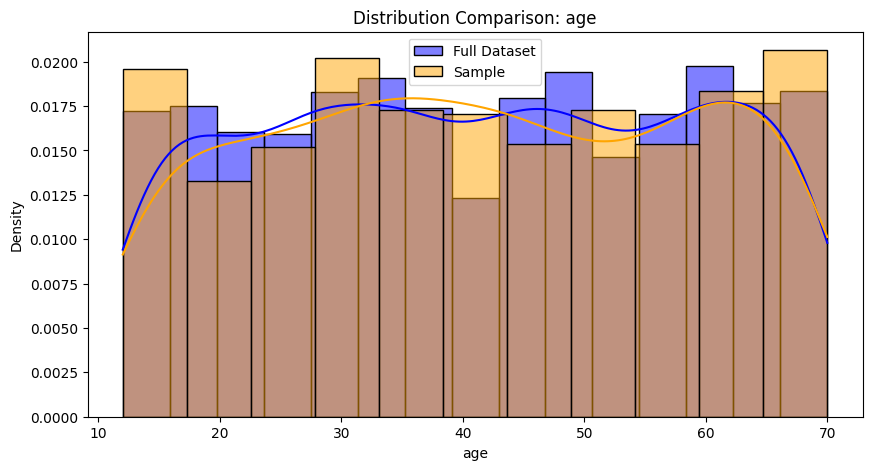

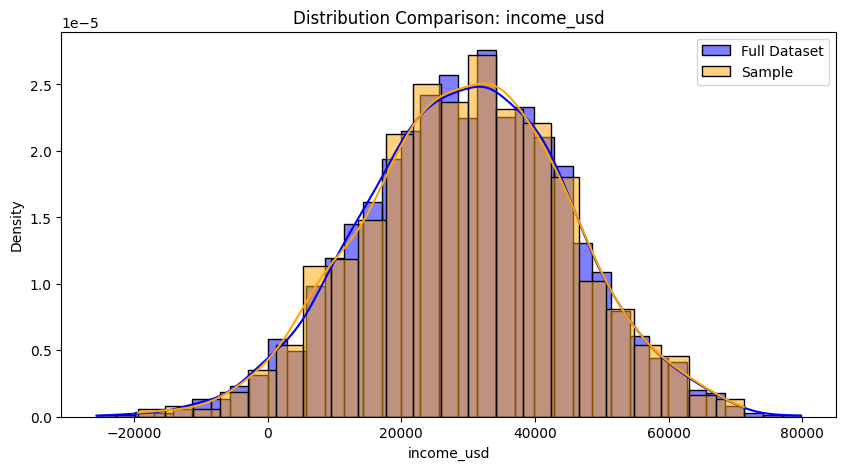

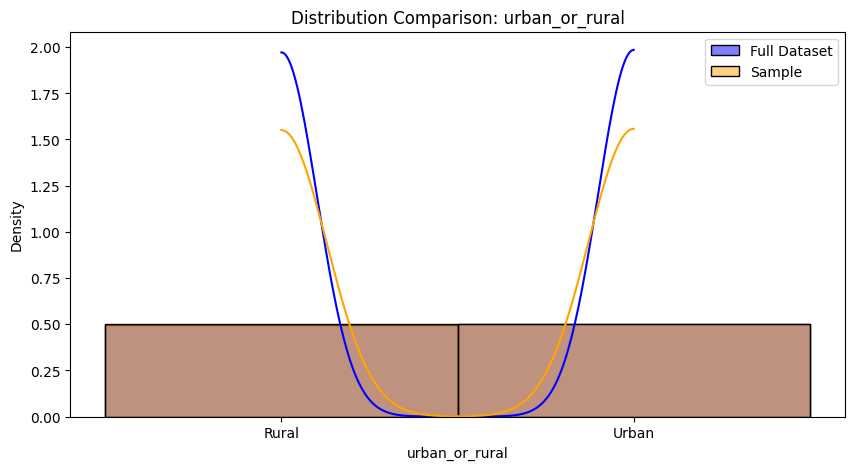

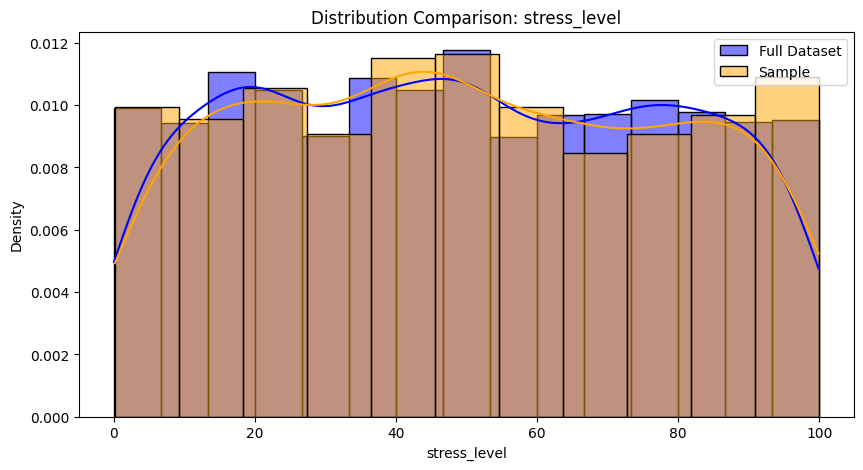

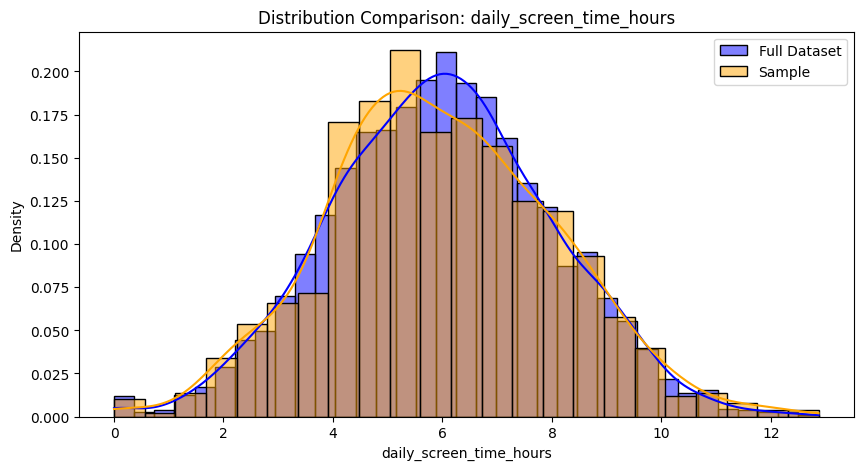

In [23]:
# Mostra e të dhënave

sample_data = df.sample(frac=0.3, random_state=42)

numeric_cols = ['age', 'income_usd', 'urban_or_rural', 'stress_level', 'daily_screen_time_hours']

for col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], color='blue', label='Full Dataset', kde=True, stat="density", alpha=0.5)
    sns.histplot(sample_data[col], color='orange', label='Sample', kde=True, stat="density", alpha=0.5)
    plt.title(f'Distribution Comparison: {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [24]:
# Trajtimi i outliers me IQR

Q1 = df["income_usd"].quantile(0.25)
Q2 = df["income_usd"].quantile(0.50)
Q3 = df["income_usd"].quantile(0.75)
Q4 = df["income_usd"].max()

IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1}")
print(f"Q2 (Median): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"Q4 (Max): {Q4}")
print(f"IQR (Q3 - Q1): {IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

outliers = df[(df["income_usd"] < lower_bound) | (df["income_usd"] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

count_above_upper = (df["income_usd"] > upper_bound).sum()
count_below_lower = (df["income_usd"] < lower_bound).sum()

print(f"Count of values above upper bound: {count_above_upper}")
print(f"Count of values below lower bound: {count_below_lower}")

# ✅ Remove outliers directly from df
df = df[(df["income_usd"] >= lower_bound) & (df["income_usd"] <= upper_bound)]

print(f"Original dataset size: {len(df) + len(outliers)}")
print(f"Dataset size after removing outliers: {len(df)}")

df.describe()


Q1 (25th percentile): 19482.704999999998
Q2 (Median): 30002.71
Q3 (75th percentile): 40352.0175
Q4 (Max): 79829.55
IQR (Q3 - Q1): 20869.312500000004
Lower Bound:  -11821.26375000001
Upper Bound:  71655.98625000002
Number of outliers: 14
Count of values above upper bound: 4
Count of values below lower bound: 10
Original dataset size: 3000
Dataset size after removing outliers: 2986


,age,income_usd,daily_screen_time_hours,phone_unlocks_per_day,social_media_usage_hours,gaming_usage_hours,streaming_usage_hours,messaging_usage_hours,work_related_usage_hours,sleep_hours,...,monthly_data_usage_gb,has_night_mode_on,age_first_phone,push_notifications_per_day,tech_savviness_score,education_level_encoded,relationship_status_encoded,urban_or_rural_encoded,self_reported_addiction_level_encoded,gender_encoded
count,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,...,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2418.000000,2986.000000,2986.000000,2986.000000,2986.000000
mean,41.318486,29876.619066,5.984012,79.696919,1.997405,1.519357,1.989786,1.489585,2.003138,6.493768,...,24.892689,0.504689,13.947421,99.102813,49.497361,2.221671,2.509377,1.498326,2.504689,1.979906
std,17.057653,15075.840248,2.018028,25.134910,0.963884,0.935469,0.981379,0.508757,0.953636,0.994143,...,9.725931,0.500062,3.739362,30.272616,28.842046,1.291772,1.117882,0.500081,1.120307,0.824010
min,12.000000,-11666.840000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.810000,...,0.000000,0.000000,8.000000,0.000000,0.010000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.000000,19594.062500,4.590000,63.000000,1.340000,0.812500,1.290000,1.140000,1.340000,5.840000,...,18.315000,0.000000,11.000000,79.000000,23.732500,1.000000,1.250000,1.000000,1.000000,1.000000
50%,42.000000,30035.340000,5.980000,80.000000,2.010000,1.520000,2.005000,1.500000,1.980000,6.490000,...,25.045000,1.000000,14.000000,99.000000,49.205000,1.000000,3.000000,1.000000,3.000000,2.000000
75%,56.000000,40351.297500,7.307500,96.000000,2.640000,2.180000,2.650000,1.840000,2.660000,7.160000,...,31.467500,1.000000,17.000000,119.000000,74.152500,3.000000,3.000000,2.000000,4.000000,3.000000
max,70.000000,71271.660000,12.870000,182.000000,5.050000,4.860000,5.180000,3.070000,5.260000,10.320000,...,54.850000,1.000000,20.000000,204.000000,99.940000,4.000000,4.000000,2.000000,4.000000,3.000000


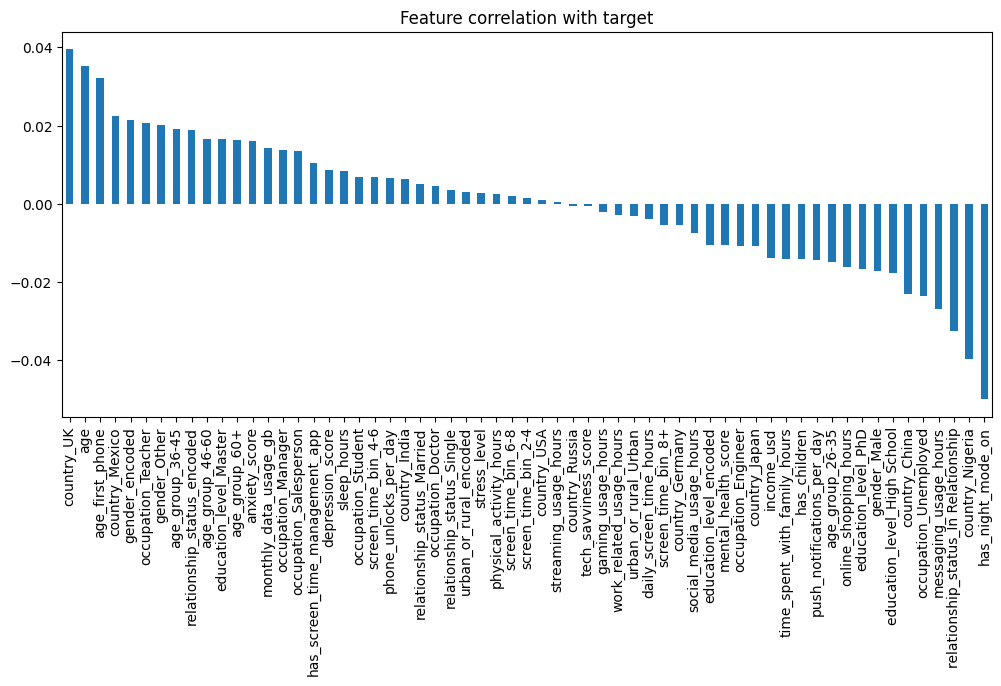

KeyboardInterrupt: 

In [25]:
#zgjedhja e nën bashkësisë së vetive
target_column = "self_reported_addiction_level"
X = df.drop(columns=[target_column, "self_reported_addiction_level_encoded"], errors='ignore')

y = df[target_column]

le = LabelEncoder()
y_encoded = le.fit_transform(y)


X_encoded = pd.get_dummies(X, drop_first=True)


X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce')
X_encoded = X_encoded.fillna(0)

# 4️ Correlation with target
corr = X_encoded.corrwith(pd.Series(y_encoded))
plt.figure(figsize=(12,5))
corr.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature correlation with target")
plt.show()

# 5️ Feature selection using SelectKBest (f_classif)
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X_encoded, y_encoded)
top_features_f = X_encoded.columns[selector.get_support()]

# 6️ Recursive Feature Elimination (RFE) with RandomForest
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_encoded, y_encoded)
top_features_rfe = X_encoded.columns[rfe.support_]
print("Top 5 features (RFE with RandomForest):", top_features_rfe.tolist())

In [26]:
# Diskretizimi i 'daily_screen_time_hours' ne kategori
bins = [0, 2, 5, 8, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']
df['Screen_Time_Category'] = pd.cut(df['daily_screen_time_hours'], bins=bins, labels=labels)
print("\n Diskretizimi u aplikua mbi kolonën 'Daily_Screen_Time_Hours'")
print(df[['daily_screen_time_hours', 'Screen_Time_Category']].head())





 Diskretizimi u aplikua mbi kolonën 'Daily_Screen_Time_Hours'
   daily_screen_time_hours Screen_Time_Category
0                     5.81                 High
1                     9.05            Very High
2                     5.76                 High
3                     6.71                 High
4                     6.31                 High


In [27]:
#Binarizimi
binarize_cols = [
    'gender', 'relationship_status', 'urban_or_rural', 'has_children'
]

binarized_dfs = []

for col in binarize_cols:
    if col in df.columns:
        
        if df[col].dtype == bool:
            df[col] = df[col].astype(int)

        dummies = pd.get_dummies(df[col], prefix=col, dtype=int)  
        df = pd.concat([df, dummies], axis=1)
        binarized_dfs.append(dummies)
        print(f" U krye binarizimi për kolonën: {col}")
    else:
        print(f"Kolona '{col}' nuk ekziston — u anashkalua.")

if binarized_dfs:
    binarized_result = pd.concat(binarized_dfs, axis=1)
    print("\n--- Kolonat e binarizuara (me 0 dhe 1) ---")
    print(binarized_result.head(5))
else:
    print("\n Asnjë kolonë nuk u binarizua — kontrollo emrat e kolonave.")

df.head()


 U krye binarizimi për kolonën: gender
 U krye binarizimi për kolonën: relationship_status
 U krye binarizimi për kolonën: urban_or_rural
 U krye binarizimi për kolonën: has_children

--- Kolonat e binarizuara (me 0 dhe 1) ---
   gender_Female  gender_Male  gender_Other  relationship_status_Divorced  \
0              0            1             0                             0   
1              0            1             0                             0   
2              0            0             1                             0   
3              1            0             0                             0   
4              0            0             1                             1   

   relationship_status_In Relationship  relationship_status_Married  \
0                                    0                            0   
1                                    1                            0   
2                                    0                            0   
3                         

,country,age,gender,occupation,education_level,income_usd,daily_screen_time_hours,phone_unlocks_per_day,social_media_usage_hours,gaming_usage_hours,...,gender_Male,gender_Other,relationship_status_Divorced,relationship_status_In Relationship,relationship_status_Married,relationship_status_Single,urban_or_rural_Rural,urban_or_rural_Urban,has_children_0,has_children_1
0,India,32,Male,Salesperson,High School,43865.49,5.81,75,0.84,0.00,...,1,0,0,0,0,1,1,0,1,0
1,UK,26,Male,Artist,Master,41868.19,9.05,61,3.13,2.50,...,1,0,0,1,0,0,1,0,1,0
2,Germany,70,Other,Doctor,High School,59636.51,5.76,58,2.12,1.96,...,0,1,0,0,0,1,0,1,0,1
3,UK,44,Female,Engineer,High School,39022.07,6.71,80,1.60,2.70,...,0,0,0,1,0,0,0,1,1,0
4,Brazil,46,Other,Student,High School,-783.98,6.31,136,1.51,1.73,...,0,1,1,0,0,0,0,1,1,0


In [28]:
#Krijimi i vetive të reja
# Sa orë kalon përdoruesi në aktivitete argëtuese
df['Total_Entertainment_Hours'] = (
    df['social_media_usage_hours'] +
    df['gaming_usage_hours'] +
    df['streaming_usage_hours'] +
    df['messaging_usage_hours']
)

# Indeksi i shëndetit mendor
df['Overall_Mental_Health_Index'] = (
    df['mental_health_score'] -
    (df['stress_level'] + df['depression_score'] + df['anxiety_score']) / 3
)

print(" U krijuan vetitë e reja!")
print(df[['Total_Entertainment_Hours', 'Overall_Mental_Health_Index']].head())


 U krijuan vetitë e reja!
   Total_Entertainment_Hours  Overall_Mental_Health_Index
0                       5.64                    -5.303333
1                       8.85                    41.530000
2                       7.90                    -5.870000
3                       8.63                    25.950000
4                       6.02                    43.826667


In [ ]:
df.rename(columns={'urban_or_rural_Rural': 'is_rural'}, inplace=True)
df.rename(columns={'urban_or_rural_Urban': 'is_urban'}, inplace=True)
df["is_rural"] = df["is_rural"].astype(bool)
df["is_urban"] = df["is_urban"].astype(bool)
df["has_children_0"] = df["has_children_0"].astype(bool)
df["has_children_1"] = df["has_children_1"].astype(bool)

In [29]:
# Kolonat numerike (origjinale + të projektuara)
numerical_cols = [
    'age', 'income_usd', 'daily_screen_time_hours', 'phone_unlocks_per_day',
    'social_media_usage_hours', 'gaming_usage_hours', 'streaming_usage_hours',
    'messaging_usage_hours', 'work_related_usage_hours', 'sleep_hours',
    'physical_activity_hours', 'mental_health_score', 'depression_score',
    'anxiety_score', 'stress_level', 'time_spent_with_family_hours',
    'online_shopping_hours', 'monthly_data_usage_gb', 'age_first_phone',
    'push_notifications_per_day', 'tech_savviness_score',
    'Total_Entertainment_Hours', 'Overall_Mental_Health_Index'
]

numerical_cols = [c for c in numerical_cols if c in X_encoded.columns]
print(f"Kolonat numerike ({len(numerical_cols)}): {numerical_cols}")

Kolonat numerike (21): ['age', 'income_usd', 'daily_screen_time_hours', 'phone_unlocks_per_day', 'social_media_usage_hours', 'gaming_usage_hours', 'streaming_usage_hours', 'messaging_usage_hours', 'work_related_usage_hours', 'sleep_hours', 'physical_activity_hours', 'mental_health_score', 'depression_score', 'anxiety_score', 'stress_level', 'time_spent_with_family_hours', 'online_shopping_hours', 'monthly_data_usage_gb', 'age_first_phone', 'push_notifications_per_day', 'tech_savviness_score']


In [ ]:
# Kufizimi vlerat negative
for col in numerical_cols:
    if X_encoded[col].min() < 0:
        old_min = X_encoded[col].min()
        X_encoded[col] = X_encoded[col].clip(lower=0)
        print(f"Kufizuar vlerat negative në '{col}' (minimumi ishte {old_min})")

In [ ]:
# SMOOTHING– ndarja në interval me gjerësi të barabartë për income_usd

if 'income_usd' in X_encoded.columns:
    print("\nZbutja e 'income_usd' (5 intervale me gjerësi të barabartë)…")
    X_encoded['income_usd_smoothed'], bins = pd.cut(
        X_encoded['income_usd'], bins=5, retbins=True, labels=False
    )
    X_encoded['income_usd_smoothed'] = X_encoded['income_usd_smoothed'].astype(float)
    print(f"   Kufijtë e intervaleve: {bins.round(0)}")
else:
    print("'income_usd' nuk gjendet → anashkalohet zbutja.")

In [30]:
# 4. Agregim: aktiviteti total ditor dixhital
agg_cols = [
    'daily_screen_time_hours', 'social_media_usage_hours',
    'gaming_usage_hours', 'streaming_usage_hours',
    'messaging_usage_hours', 'work_related_usage_hours'
]
X_encoded['Total_Digital_Activity_Hours'] = X_encoded[agg_cols].sum(axis=1)


1. Normalizimi Min-Max  v' = (v-min)/(max-min)
   Manuale  $73,600 → 1.0281


c:\Users\Rinor\Faculty\PVDH\PVDH-G10\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Rinor\Faculty\PVDH\PVDH-G10\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


   Sklearn (përafërsim) $73,600 → 1.0281

2. Normalizimi Z-Score  v' = (v-μ)/σ
   Manuale  $73,600 → z = (73600-29,877) / 15,076 = 2.9002
   Sklearn (përafërsim) $73,600 → 2.9007

3. Shkallëzimi Dhjetor  v' = v / 10^j  (max |v'| < 1)
   age: ÷ 10^2  → max abs = 0.7000
   income_usd: ÷ 10^5  → max abs = 0.7127
   daily_screen_time_hours: ÷ 10^2  → max abs = 0.1287
   phone_unlocks_per_day: ÷ 10^3  → max abs = 0.1820
   social_media_usage_hours: ÷ 10^1  → max abs = 0.5050
   gaming_usage_hours: ÷ 10^1  → max abs = 0.4860
   streaming_usage_hours: ÷ 10^1  → max abs = 0.5180
   messaging_usage_hours: ÷ 10^1  → max abs = 0.3070
   work_related_usage_hours: ÷ 10^1  → max abs = 0.5260
   sleep_hours: ÷ 10^2  → max abs = 0.1032
   physical_activity_hours: ÷ 10^1  → max abs = 0.2800
   mental_health_score: ÷ 10^2  → max abs = 0.9997
   depression_score: ÷ 10^2  → max abs = 0.9983
   anxiety_score: ÷ 10^3  → max abs = 0.1000
   stress_level: ÷ 10^2  → max abs = 0.9988
   time_spent_with_family_h

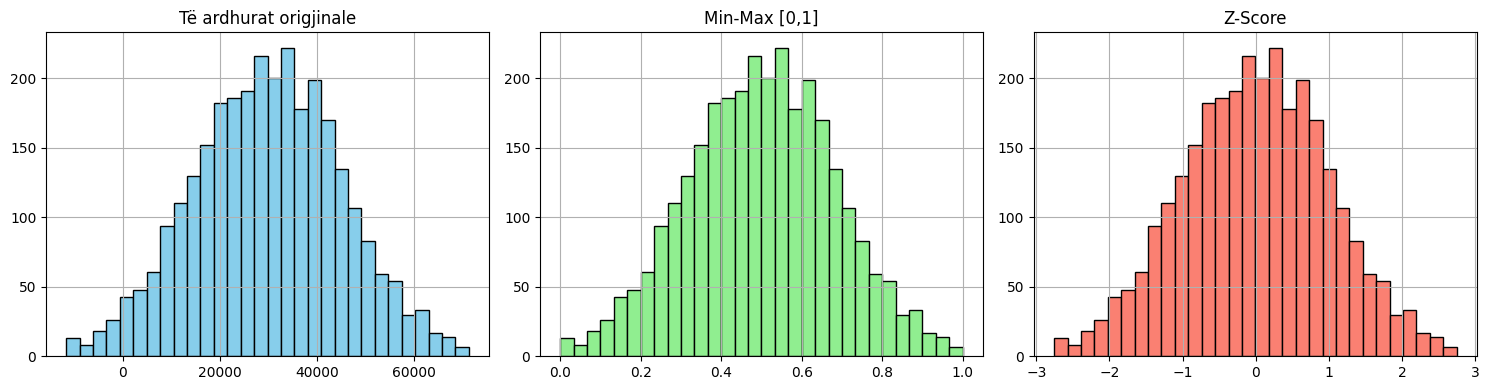


Transformimi përfundoi! Forma e X_encoded: (2986, 62)


In [31]:
X_minmax = X_encoded.copy()
X_zscore = X_encoded.copy()
X_decimal = X_encoded.copy()

v = 73600
col = 'income_usd'

print("\n1. Normalizimi Min-Max  v' = (v-min)/(max-min)")

minmax_ct = ColumnTransformer(
    [(c, MinMaxScaler(), [c]) for c in numerical_cols],
    remainder='passthrough'
)

X_minmax[numerical_cols] = minmax_ct.fit_transform(X_encoded[numerical_cols])

if col in X_encoded.columns:
    min_v = X_encoded[col].min()
    max_v = X_encoded[col].max()
    manual = (v - min_v) / (max_v - min_v)
    print(f"   Manuale  ${v:,} → {manual:.4f}")

    match = X_minmax.loc[X_encoded[col] == v, col]
    if not match.empty:
        print(f"   Sklearn (saktë) ${v:,} → {match.iloc[0]:.4f}")
    else:
        scaler_for_col = minmax_ct.named_transformers_[col]
        approx = scaler_for_col.transform([[v]])[0][0]
        print(f"   Sklearn (përafërsim) ${v:,} → {approx:.4f}")

print("\n2. Normalizimi Z-Score  v' = (v-μ)/σ")

z_ct = ColumnTransformer(
    [(c, StandardScaler(), [c]) for c in numerical_cols],
    remainder='passthrough'
)

X_zscore[numerical_cols] = z_ct.fit_transform(X_encoded[numerical_cols])

if col in X_encoded.columns:
    mu    = X_encoded[col].mean()
    sigma = X_encoded[col].std()
    manual_z = (v - mu) / sigma
    print(f"   Manuale  ${v:,} → z = ({v}-{mu:,.0f}) / {sigma:,.0f} = {manual_z:.4f}")

    match_z = X_zscore.loc[X_encoded[col] == v, col]
    if not match_z.empty:
        print(f"   Sklearn (saktë) ${v:,} → {match_z.iloc[0]:.4f}")
    else:
        scaler_z = z_ct.named_transformers_[col]
        approx_z = scaler_z.transform([[v]])[0][0]
        print(f"   Sklearn (përafërsim) ${v:,} → {approx_z:.4f}")

print("\n3. Shkallëzimi Dhjetor  v' = v / 10^j  (max |v'| < 1)")
for c in numerical_cols:
    max_abs = X_encoded[c].abs().max()
    j = 0
    while max_abs >= 1 and j < 20:
        max_abs /= 10
        j += 1
    if j:
        X_decimal[c] = X_encoded[c] / (10 ** j)
        print(f"   {c}: ÷ 10^{j}  → max abs = {X_decimal[c].abs().max():.4f}")


X_normalized = X_minmax.copy()
print("\nTë dhënat finale të normalizuara → X_normalized (Min-Max)")

if col in X_encoded.columns:
    fig, ax = plt.subplots(1, 3, figsize=(15, 4))
    X_encoded[col].hist(ax=ax[0], bins=30, color='skyblue', edgecolor='black')
    ax[0].set_title('Të ardhurat origjinale')
    X_minmax[col].hist(ax=ax[1], bins=30, color='lightgreen', edgecolor='black')
    ax[1].set_title('Min-Max [0,1]')
    X_zscore[col].hist(ax=ax[2], bins=30, color='salmon', edgecolor='black')
    ax[2].set_title('Z-Score')
    plt.tight_layout()
    plt.show()

X_encoded = X_normalized.copy()
print(f"\nTransformimi përfundoi! Forma e X_encoded: {X_encoded.shape}")

In [ ]:
# save new preprocessed dataset
df.to_csv('dataset/mobile_addiction_data_processed.csv', index=False)

# Detektimi i përjashtuesve dhe mënjanimi

Detektimi i përjashtuesit.


    DETEKTIMI I PËRGJITHSHËM I ANOMALIVE (GENERAL ANOMALY DETECTION)   
    Metodat: Statistical, Proximity, Density, Clustering, SVM          

Duke analizuar 21 kolona numerike për 2986 përdorues.

--- Parametrat e Përgjithshëm ---
Niveli i Kontaminimit (për LOF/SVM/KNN): 5.0%
Pragu i Z-Score: 3.0

    REZULTATET E DETEKTIMIT
Totali i rreshtave: 2986
------------------------------
Anomali sipas Z-Score: 81
Anomali sipas KNN:     150
Anomali sipas LOF:     150
Anomali sipas KMeans:  150
Anomali sipas SVM:     158
------------------------------

>>> ANOMALI TË FORTA (Të konfirmuara nga >= 3 metoda): 140

Shembull i anomalive të detektuara (Top 3):
    daily_screen_time_hours  income_usd  stress_level  Total_Votes
22                     4.43    26712.11         64.97            3
36                     5.17    35539.71         95.05            4
44                     7.72    42534.62         89.11            3


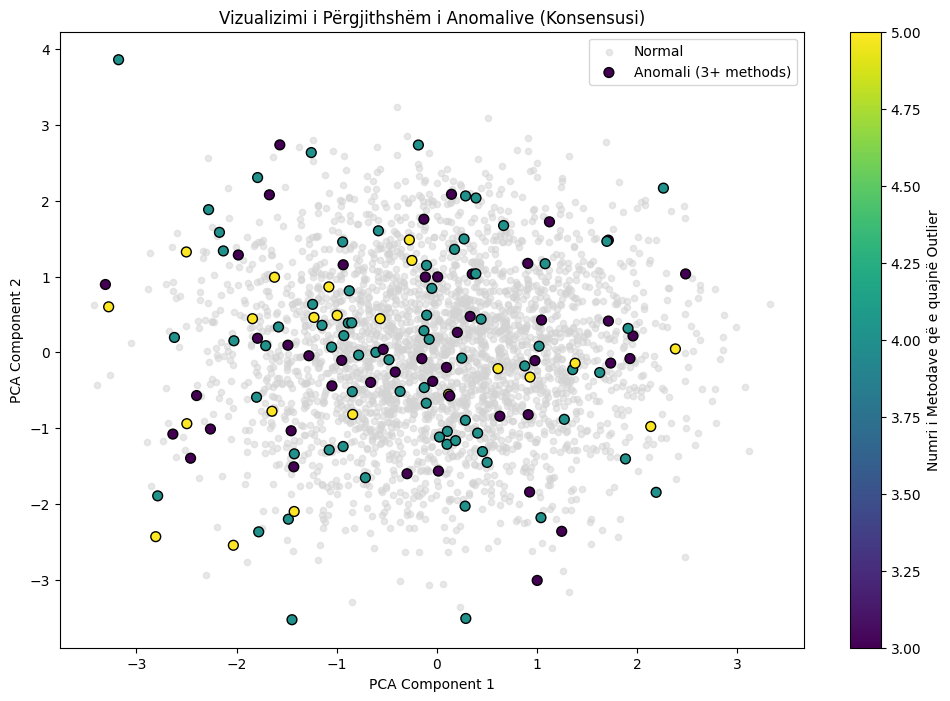

In [ ]:
print("\n" + "="*70)
print("    DETEKTIMI I PËRGJITHSHËM I ANOMALIVE (GENERAL ANOMALY DETECTION)   ")
print("    Metodat: Statistical, Proximity, Density, Clustering, SVM          ")
print("="*70 + "\n")

from sklearn.neighbors import NearestNeighbors, LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from scipy.stats import zscore

# 1. Përgatitja e të dhënave (Marrim X_zscore që është i standardizuar)
# Sigurohemi që po punojmë vetëm me kolona numerike ekzistuese
available_num_cols = [c for c in numerical_cols if c in X_zscore.columns]
X_anomaly = X_zscore[available_num_cols].copy()

print(f"Duke analizuar {X_anomaly.shape[1]} kolona numerike për {X_anomaly.shape[0]} rreshta.\n")

# =============================================================================
# DEFINIMI I FUNKSIONEVE (Për përdorim gjeneral)
# =============================================================================

def detect_statistical_zscore(data, threshold=3.0):
    """
    Sllajdet 3-6: Pika është outlier nëse vlera absolute e Z-score > threshold.
    Threshold tipik: 3 (shumë i rrallë), 2.5 (mesatar).
    """
    z_scores = np.abs(data)
    # Konsiderojmë outlier nëse të paktën 1 kolonë kalon pragun
    return (z_scores > threshold).any(axis=1)

def detect_proximity_knn(data, k=5, percentile=95):
    """
    Sllajdet 12-14: Outlier është ai që ka distancë të madhe nga k-fqinjët.
    Percentile: Përcakton pragun (p.sh. 95% e të dhënave janë normale).
    """
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(data)
    distances, _ = knn.kneighbors(data)
    avg_distances = distances.mean(axis=1)
    threshold = np.percentile(avg_distances, percentile)
    return avg_distances > threshold

def detect_density_lof(data, contamination=0.05, neighbors=20):
    """
    Sllajdet 15-18: LOF krahason dendësinë lokale.
    Contamination: Përqindja e pritur e anomalive (p.sh. 0.05 = 5%).
    """
    lof = LocalOutlierFactor(n_neighbors=neighbors, contamination=contamination)
    y_pred = lof.fit_predict(data)
    return y_pred == -1  # -1 janë outliers

def detect_clustering_kmeans(data, n_clusters=5, percentile=95):
    """
    Sllajdet 19-23: Outliers janë pikat larg qendrës së klusterit (centroidit).
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(data)
    X_dist = kmeans.transform(data)
    min_dist = np.min(X_dist, axis=1) # Distanca nga qendra më e afërt
    threshold = np.percentile(min_dist, percentile)
    return min_dist > threshold

def detect_svm(data, nu=0.05):
    """
    Sllajdet 24-25: One-Class SVM mëson kufirin e të dhënave normale.
    Nu: I ngjashëm me contamination (kufiri i sipërm i fraksionit të gabimeve).
    """
    svm = OneClassSVM(kernel='rbf', gamma='scale', nu=nu)
    y_pred = svm.fit_predict(data)
    return y_pred == -1

# =============================================================================
# EKZEKUTIMI I ANALIZËS (Me parametra të ndryshueshëm)
# =============================================================================

# Këtu mund të ndryshosh "ashpërsinë" e detektimit
CONTAMINATION_LEVEL = 0.05  # 5% e të dhënave supozohet të jenë anomali
Z_SCORE_THRESHOLD = 3.0     # Standardi statistikor

print(f"--- Parametrat e Përgjithshëm ---")
print(f"Niveli i Kontaminimit (për LOF/SVM/KNN): {CONTAMINATION_LEVEL * 100}%")
print(f"Pragu i Z-Score: {Z_SCORE_THRESHOLD}")

# Ruajmë rezultatet në një DataFrame të përkohshëm
results = pd.DataFrame(index=df.index)

# 1. Z-Score
results['Outlier_ZScore'] = detect_statistical_zscore(X_anomaly, threshold=Z_SCORE_THRESHOLD).astype(int)

# 2. KNN (Proximity)
# Përdorim (100 - contamination*100) për të gjetur percentile (psh 95%)
percentile_thresh = 100 * (1 - CONTAMINATION_LEVEL)
results['Outlier_KNN'] = detect_proximity_knn(X_anomaly, k=5, percentile=percentile_thresh).astype(int)

# 3. LOF (Density)
results['Outlier_LOF'] = detect_density_lof(X_anomaly, contamination=CONTAMINATION_LEVEL).astype(int)

# 4. Clustering (K-Means)
results['Outlier_KMeans'] = detect_clustering_kmeans(X_anomaly, n_clusters=5, percentile=percentile_thresh).astype(int)

# 5. SVM
results['Outlier_SVM'] = detect_svm(X_anomaly, nu=CONTAMINATION_LEVEL).astype(int)

# Totali i votave (Consensus)
results['Total_Votes'] = results.sum(axis=1)

# Shtojmë rezultatet në datasetin kryesor
df = pd.concat([df, results], axis=1)

# =============================================================================
# RAPORTI PËRMBLEDHËS
# =============================================================================

print("\n" + "="*40)
print("    REZULTATET E DETEKTIMIT")
print("="*40)
print(f"Totali i rreshtave: {len(df)}")
print("-" * 30)
print(f"Anomali sipas Z-Score: {results['Outlier_ZScore'].sum()}")
print(f"Anomali sipas KNN:     {results['Outlier_KNN'].sum()}")
print(f"Anomali sipas LOF:     {results['Outlier_LOF'].sum()}")
print(f"Anomali sipas KMeans:  {results['Outlier_KMeans'].sum()}")
print(f"Anomali sipas SVM:     {results['Outlier_SVM'].sum()}")
print("-" * 30)

# Identifikojmë anomalitë e forta (ato që 3 ose më shumë modele bien dakord)
strong_outliers = df[df['Total_Votes'] >= 3]
print(f"\n>>> ANOMALI TË FORTA (Të konfirmuara nga >= 3 metoda): {len(strong_outliers)}")

# Shfaqim disa shembuj të anomalive të forta
if not strong_outliers.empty:
    print("\nShembull i anomalive të detektuara (Top 3):")
    cols_to_show = ['daily_screen_time_hours', 'income_usd', 'stress_level', 'Total_Votes']
    # Sigurohemi që kolonat ekzistojnë para se t'i printojmë
    cols_to_show = [c for c in cols_to_show if c in df.columns]
    print(strong_outliers[cols_to_show].head(3))
else:
    print("Nuk u gjetën anomali të forta me këta parametra.")

# =============================================================================
# VIZUALIZIMI I PËRGJITHSHËM (Të gjitha metodat në një plot)
# =============================================================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_anomaly)

plt.figure(figsize=(12, 8))
# Pikat normale
plt.scatter(X_pca[df['Total_Votes'] < 3, 0], X_pca[df['Total_Votes'] < 3, 1], 
            c='lightgray', label='Normal', alpha=0.5, s=20)
# Pikat anomali (të ngjyrosura sipas numrit të votave)
sc = plt.scatter(X_pca[df['Total_Votes'] >= 3, 0], X_pca[df['Total_Votes'] >= 3, 1], 
            c=df.loc[df['Total_Votes'] >= 3, 'Total_Votes'], 
            cmap='viridis', label='Anomali (3+ methods)', s=50, edgecolor='k')
plt.colorbar(sc, label='Numri i Metodave që e quajnë Outlier')
plt.title('Vizualizimi i Përgjithshëm i Anomalive (Konsensusi)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()